<a href="https://colab.research.google.com/github/Adith-Manu/Airplane_Maintenance_Alert_Likelihood_Prediction/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<H1>  Airplane Maintenance Alert Likelihood Prediction (Project)  </H1>

---

<H4> (1) Airplane Maintenance Data Generation </H4>

---



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

def generate_airplane_maintenance_data(num_samples= 10000, random_seed=50):
    """
    Generates synthetic data for airplane maintenance alert likelihood prediction.

    Args:
        num_samples (int): The number of synthetic aircraft records to generate.
        random_seed (int): Seed for reproducibility.

    Returns:
        pandas.DataFrame: A DataFrame containing the generated features and target variable.
        tuple: Scaled X_train, y_train, X_test, y_test for direct use in a model.
    """
    np.random.seed(random_seed)

    # --- 1. Defining and Generating Features ---
    # Aircraft Age (Years)
    aircraft_age = np.random.randint(1, 31, num_samples) # 1 to 30 years

    # Total Flight Hours Since New (simulating higher usage over time)
    # Scale flight hours somewhat with age for more realism
    total_flight_hours = np.random.uniform(500, 20000, num_samples) + \
                         aircraft_age * np.random.uniform(1000, 3000, num_samples)
    total_flight_hours = np.round(total_flight_hours).astype(int)

    # Hours Since Last Major Maintenance (e.g., C-check)
    hours_since_last_maintenance = np.random.uniform(0, 4500, num_samples) # 0 to 4500 hours

    # Average Engine Vibration Score (simulated sensor data)
    # Higher scores indicate more potential issues
    avg_engine_vibration_score = np.random.uniform(0.1, 1.0, num_samples)

    # Number of Minor Faults in Last 100 Flight Hours
    num_minor_faults_last_100_hours = np.random.randint(0, 6, num_samples) # 0 to 5 faults

    # Fluid Level Deviation Percentage (negative means low, positive means high, 0 is ideal)
    fluid_level_deviation_percent = np.random.uniform(-0.15, 0.05, num_samples) # -15% to +5%

    # Landing Gear Cycles Since Last Inspection
    landing_gear_cycles_since_last_inspection = np.random.randint(0, 1800, num_samples) # 0 to 1799 cycles

    # Airplane_Body_Inspection Since Last Inspection
    flight_hours_since_last_body_inspection = np.random.randint(0, 3600, num_samples) # 0 to 3599 cycles

    # --- 2. Creating a DataFrame from Features ---
    data = pd.DataFrame({
        'Aircraft_Age_Years': aircraft_age,
        'Total_Flight_Hours_Since_New': total_flight_hours,
        'Hours_Since_Last_Major_Maintenance': hours_since_last_maintenance,
        'Avg_Engine_Vibration_Score': avg_engine_vibration_score,
        'Num_Minor_Faults_Last_100_Hours': num_minor_faults_last_100_hours,
        'Fluid_Level_Deviation_Percent': fluid_level_deviation_percent,
        'Landing_Gear_Cycles_Since_Last_Inspection': landing_gear_cycles_since_last_inspection,
        'Flight_Hours_Since_Last_Body_Inspection': flight_hours_since_last_body_inspection
    })

    # --- 3. Defining Logic for Maintenance_Alert_Likelihood (Target Variable) ---
    # Initialize all to 0 (no alert)
    data['Maintenance_Alert_Likelihood'] = 0

    # Rule 1: Old and heavily used aircraft are more likely to have alerts
    data.loc[(data['Aircraft_Age_Years'] > 20) &
             (data['Total_Flight_Hours_Since_New'] > 60000),
             'Maintenance_Alert_Likelihood'] = 1

    # Rule 2: High hours since last major maintenance OR high vibration score
    data.loc[(data['Hours_Since_Last_Major_Maintenance'] > 3500) |
             (data['Avg_Engine_Vibration_Score'] > 0.85),
             'Maintenance_Alert_Likelihood'] = 1

    # Rule 3: Multiple recent minor faults AND significant fluid deviation
    data.loc[(data['Num_Minor_Faults_Last_100_Hours'] >= 3) &
             (data['Fluid_Level_Deviation_Percent'] < -0.10),
             'Maintenance_Alert_Likelihood'] = 1

    # Rule 4: High landing gear cycles AND older age
    data.loc[(data['Landing_Gear_Cycles_Since_Last_Inspection'] > 1500) &
             (data['Aircraft_Age_Years'] > 15),
             'Maintenance_Alert_Likelihood'] = 1

    # Rule 5: High flight hours since last body inspection
    data.loc[(data['Flight_Hours_Since_Last_Body_Inspection'] > 2000) &
             (data['Aircraft_Age_Years'] > 15),
             'Maintenance_Alert_Likelihood'] = 1

    # --- 4. Adding some Random Noise (to make it less perfectly separable) ---
    # Introduceing a small chance of alert even for 'good' planes, or no alert for 'bad' ones
    random_alerts = np.random.rand(num_samples)
    data.loc[random_alerts < 0.05, 'Maintenance_Alert_Likelihood'] = 1 # 5% random alerts
    data.loc[random_alerts > 0.95, 'Maintenance_Alert_Likelihood'] = 0 # 5% random 'no alerts' if already 1

    # Ensuring target variable is integer type
    data['Maintenance_Alert_Likelihood'] = data['Maintenance_Alert_Likelihood'].astype(int)

    # --- 5. Preparing Data for ML (Split and Scale) ---
    X = data.drop('Maintenance_Alert_Likelihood', axis=1)
    y = data['Maintenance_Alert_Likelihood']

    # Simple train-test split (e.g., 80% train, 20% test)
    # For synthetic data, a simple random split is fine
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

    # Applying StandardScaler to numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Generated {num_samples} samples.")
    print("\nShape of X_train:", X_train.shape)
    print("Shape of X_train_scaled:", X_train_scaled.shape)
    print("Shape of y_train:", y_train.shape)
    print("\nShape of X_test", X_test.shape)
    print("Shape of X_test_scaled:", X_test_scaled.shape)
    print("Shape of y_test:", y_test.shape)

    return data, (X_train, X_train_scaled, y_train, X_test, X_test_scaled, y_test)

# --- Using the function ---
# Generate the data
full_data_df, (X_train, X_train_scaled, y_train, X_test, X_test_scaled, y_test) = generate_airplane_maintenance_data(num_samples= 10000)

# The 'full_data_df' contains the raw DataFrame
# The tuple (X_train, X_train_scaled, y_train, X_test, X_test_scaled, y_test) contains preprocessed data ready for TensorFlow

Generated 10000 samples.

Shape of X_train: (8000, 8)
Shape of X_train_scaled: (8000, 8)
Shape of y_train: (8000,)

Shape of X_test (2000, 8)
Shape of X_test_scaled: (2000, 8)
Shape of y_test: (2000,)


In [ ]:
Training_Data = pd.DataFrame(X_train)
Training_Data['[Maintenance_Alert_Likelihood]'] = y_train

Training_Data.index = [x for x in range(1, len(Training_Data) + 1)]
Training_Data.columns = ['[Aircraft_Age_Years]',  '[Total_Flight_Hours_Since_New]',  '[Hours_Since_Last_Major_Maintenance]',  '[Avg_Eng_Vibration_Score]',  '[Num_Minor_Faults_Last_100_Hours]',
                         '[Fluid_Level_Deviation_Percent]',  '[Landing_Gear_Cycles_Since_Last_Inspection]',  '[Flight_Hours_Since_Last_Body_Inspection]',  '[Maintenance_Alert_Likelihood]']
Training_Data

,[Aircraft_Age_Years],[Total_Flight_Hours_Since_New],[Hours_Since_Last_Major_Maintenance],[Avg_Eng_Vibration_Score],[Num_Minor_Faults_Last_100_Hours],[Fluid_Level_Deviation_Percent],[Landing_Gear_Cycles_Since_Last_Inspection],[Flight_Hours_Since_Last_Body_Inspection],[Maintenance_Alert_Likelihood]
1,23,37143,2245.086717,0.495643,5,0.019633,1402,3187,1
2,7,16813,4150.839481,0.163084,5,-0.087387,768,1821,1
3,28,61258,2705.276785,0.581780,2,-0.020693,755,819,1
4,4,23502,2168.516050,0.732399,2,-0.082493,254,1292,0
5,7,27448,1002.551105,0.722413,0,-0.121260,38,2113,0
...,...,...,...,...,...,...,...,...,...
7996,25,71824,3382.256687,0.252891,4,-0.089639,1335,2358,1
7997,6,28254,1661.604793,0.467978,5,0.041708,1497,1343,1
7998,12,20664,967.344260,0.629625,5,-0.108897,252,3318,1
7999,21,27941,3161.590206,0.787828,2,0.010698,315,3530,0


---

<H4> (2) Some Graph Visuailizations of Generated Data </H4>

---



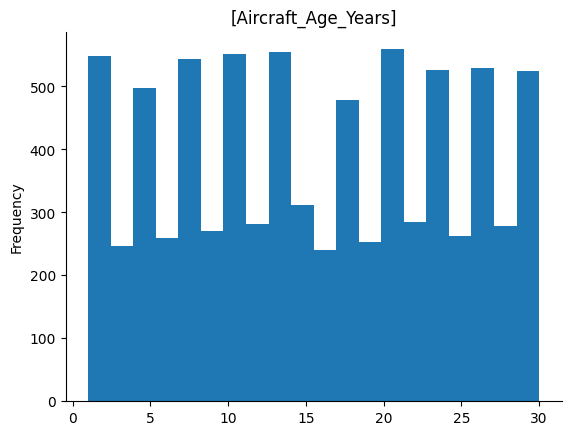

In [ ]:
Training_Data['[Aircraft_Age_Years]'].plot(kind='hist', bins=20, title='[Aircraft_Age_Years]')
plt.gca().spines[['top', 'right',]].set_visible(False)

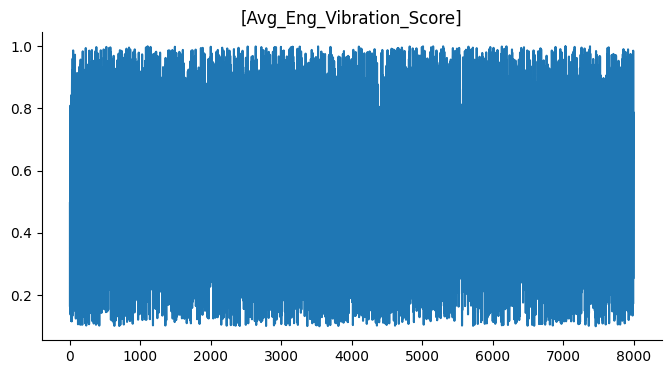

In [ ]:
Training_Data['[Avg_Eng_Vibration_Score]'].plot(kind='line', figsize=(8, 4), title='[Avg_Eng_Vibration_Score]')
plt.gca().spines[['top', 'right']].set_visible(False)

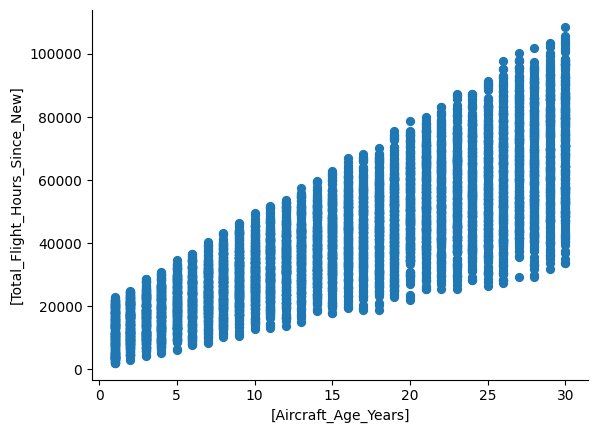

In [ ]:
Training_Data.plot(kind='scatter', x='[Aircraft_Age_Years]', y='[Total_Flight_Hours_Since_New]', s=32)
plt.gca().spines[['top', 'right',]].set_visible(False)

---

<H4> (3) Neural Network Creation using Tensorflow </H4>

---



In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

Model = Sequential([
    Dense(20, activation= "relu", name= "Layer_1"),
    Dense(15, activation= "relu", name= "Layer_2"),
    Dense(10, activation= "relu", name= "Layer_3"),
    Dense(5, activation= "relu", name= "Layer_4"),
    Dense(1, activation= "linear", name= "Output_Layer")
], name= "Airplane_Maintenance_Alert_Likelihood_Prediction_Model")

print("\nInitial Model:\n") ; Model.summary() ; print()

Model.compile(
    loss= BinaryCrossentropy(from_logits = True),
    optimizer= Adam(learning_rate = 0.01),
    metrics= ['accuracy']
)

print("\n\nTraining The Model:\n")

Model.fit(X_train_scaled, y_train, epochs = 40)

print("\n\n\nTrained Model:")
print() ; Model.summary() ; print()


Initial Model:



Model: "Airplane_Maintenance_Alert_Likelihood_Prediction_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)




Training The Model:

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7383 - loss: 0.4828
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8545 - loss: 0.3461
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8648 - loss: 0.3344
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8734 - loss: 0.3220
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8861 - loss: 0.3027
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.2938
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.2816
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9032 - loss: 0.2695
Epoch 9/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.2729
Epoch 10/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.2648
Epoch 11/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.2602
Epoch 12/40
250/250 ━━━━━━━━

Model: "Airplane_Maintenance_Alert_Likelihood_Prediction_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (32, 20)               │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (32, 15)               │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (32, 10)               │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_4 (Dense)                 │ (32, 5)                │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (32, 1)                │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,150 (8.40 KB)

 Trainable params: 716 (2.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,434 (5.61 KB)

---

<H4> (4) Neural Network Predictions with Sigmoid Activation for (0-1) Scaling </H4>

---



In [ ]:
Predictions_unscaled = Model.predict(X_test_scaled)
print("\n\nPredictions (First 10) before applying Sigmoid Activation (UnScaled):\n")
print(Predictions_unscaled[:10])

# Apply sigmoid activation to the predictions to get probabilities
Predictions = tf.sigmoid(Predictions_unscaled)

# Print the first few predictions after applying sigmoid
print("\n\nPredictions (First 10) after applying Sigmoid Activation (Scaled):\n")
print(Predictions.numpy()[:10])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Predictions (First 10) before applying Sigmoid Activation (UnScaled):

[[ 6.575062 ]
 [-2.4792948]
 [ 3.8499556]
 [ 1.961368 ]
 [ 2.8762953]
 [ 3.6219463]
 [-2.336367 ]
 [ 0.3247192]
 [-1.5649233]
 [ 2.8849952]]


Predictions (First 10) after applying Sigmoid Activation (Scaled):

[[0.9986072 ]
 [0.07732249]
 [0.97916275]
 [0.8766809 ]
 [0.9466621 ]
 [0.97396535]
 [0.08815552]
 [0.5804739 ]
 [0.1729413 ]
 [0.9470997 ]]


---

<H4> (5) Thresholding for Binary Classification (0 & 1) </H4>

---





In [ ]:
Pred_Prob_List = (Predictions.numpy() >= 0.5).astype(int).flatten()
print("Predictions (First 10) after thresholding:\n")
print(Pred_Prob_List[:10])

Predictions (First 10) after thresholding:

[1 0 1 1 1 1 0 1 0 1]


---

<H4> (6) Testing_Data with Predictions </H4>

---



In [ ]:
D_Frame = pd.DataFrame(X_test)

D_Frame.index = [x for x in range(1, len(D_Frame) + 1)]

D_Frame.columns = ['[Aircraft_Age_Years]',  '[Total_Flight_Hours_Since_New]',  '[Hours_Since_Last_Major_Maintenance]',  '[Avg_Eng_Vibration_Score]','[Num_Minor_Faults_Last_100_Hours]',
                   '[Fluid_Level_Deviation_Percent]',  '[Landing_Gear_Cycles_Since_Last_Inspection]',  '[Flight_Hours_Since_Last_Body_Inspection]']

D_Frame['[Maintenance_Alert_Likelihood_Predicted]'] = Pred_Prob_List
D_Frame['[Maintenance_Alert_Likelihood_True]'] = y_test.values

D_Frame

,[Aircraft_Age_Years],[Total_Flight_Hours_Since_New],[Hours_Since_Last_Major_Maintenance],[Avg_Eng_Vibration_Score],[Num_Minor_Faults_Last_100_Hours],[Fluid_Level_Deviation_Percent],[Landing_Gear_Cycles_Since_Last_Inspection],[Flight_Hours_Since_Last_Body_Inspection],[Maintenance_Alert_Likelihood_Predicted],[Maintenance_Alert_Likelihood_True]
1,17,49358,1864.243912,0.995635,3,0.017385,36,3551,1,1
2,1,12696,3454.428920,0.399643,1,0.022134,406,2095,0,0
3,28,94136,2621.481334,0.376102,0,-0.141557,131,858,1,1
4,23,67511,826.921791,0.413351,5,0.036489,1299,586,1,1
5,29,85867,79.169987,0.659786,5,-0.027265,482,557,1,1
...,...,...,...,...,...,...,...,...,...,...
1996,3,8713,3103.920362,0.321878,0,-0.101537,1139,1892,0,0
1997,13,40602,2405.323704,0.470183,0,0.019057,1654,2629,0,0
1998,1,15689,2482.934145,0.705363,4,-0.144751,1113,188,1,1
1999,9,24742,1642.577901,0.123078,3,0.035215,1299,650,0,1


---

<H4> (7A) Model's Loss & Accuracy on the Test Set </H4>

---



In [ ]:
Loss, Accuracy = Model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss (Scaled Data): {Loss:.3f}")
print(f"Test Accuracy: {Accuracy:.3f} = {(Accuracy * 100):.1f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9128 - loss: 0.2888

Test Loss (Scaled Data): 0.295
Test Accuracy: 0.914 = 91.4%


---

<H4> (7B) Accuracy (Manual Calculation) </H4>

---



In [ ]:
y_pred = D_Frame["[Maintenance_Alert_Likelihood_Predicted]"]
y_true = D_Frame["[Maintenance_Alert_Likelihood_True]"]

Equal = 0

for i in range(1, len(y_pred)+1):
  if y_pred[i] == y_true[i]:
    Equal += 1

Accuracy = Equal / len(y_pred)
print(f"Test Accuracy: {Accuracy} = {(Accuracy * 100):.1f}%")

Test Accuracy: 0.9065 = 90.6%


---

<H4> (8A) Precision, Recall & F1_Score on the Test Set </H4>

---



In [ ]:
def F1_Score_Assessment(F1_Score):

  print()

  if F1_Score >= 0.90:
       return "Qualitative F1-Score Assessment: Highly Effective Model"
  elif F1_Score >= 0.80:
       return "Qualitative F1-Score Assessment: Good Performance Model"
  elif F1_Score >= 0.70:
       return "Qualitative F1-Score Assessment: Needs Significant Improvement"
  else:
       return "Qualitative F1-Score Assessment: Ineffective Model"

Precision = precision_score(y_true,y_pred)
Recall = recall_score(y_true,y_pred)
F1_Score = f1_score(y_true,y_pred)

print(f"Precision: {Precision:.2f}")
print(f"Recall: {Recall:.2f}")
print(f"F1 Score: {F1_Score:.2f}")

print(F1_Score_Assessment(F1_Score))

Precision: 0.91
Recall: 0.94
F1 Score: 0.93

Qualitative F1-Score Assessment: Highly Effective Model


---

<H4> (8B) True Positives, True Negatives, False Positives & False Negatives Calculation </H4>

---



In [ ]:
TP = ((y_pred == 1) & (y_true == 1)).sum()
print(f"True Positives: {TP}")

TN = ((y_pred == 0) & (y_true == 0)).sum()
print(f"True Negatives: {TN}")

FP = ((y_pred == 1) & (y_true == 0)).sum()
print(f"\nFalse Positives: {FP}")

FN = ((y_pred == 0) & (y_true == 1)).sum()
print(f"False Negatives: {FN}")

if TP + TN + FP + FN == len(y_pred):
  print("\nTotal Count = Test Set Count =", len(y_pred))
else:
  raise ValueError("Total Count is not equal to Test Set Count")

True Positives: 1160
True Negatives: 653

False Positives: 112
False Negatives: 75

Total Count = Test Set Count = 2000


---

<H4> (8C) Precision, Recall & F1_Score (Manual Calculation) </H4>

---



In [ ]:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = (2 * Precision * Recall) / (Precision + Recall)

print(f"Precision: {Precision:.2f}")
print(f"Recall: {Recall:.2f}")
print(f"F1 Score: {F1_Score:.2f}")

print(F1_Score_Assessment(F1_Score))


Precision: 0.91
Recall: 0.94
F1 Score: 0.93

Qualitative F1-Score Assessment: Highly Effective Model
